In [ ]:
apiKey="4CiQzYxwK7Q70iCQm2I8"
!pip install roboflow
from roboflow import Roboflow
import os

rf = Roboflow(api_key=apiKey)
project = rf.workspace("gemastik-rldu5").project("human-thermal-detection-regtz")
version = project.version(5)
dataset = version.download("yolov12")
locDataset = os.path.join(dataset.location, 'data.yaml')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 101.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Human-Thermal-Detection-5 in yolov12:: 100%|██████████| 9760/9760 [00:01<00:00, 7179.11it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/runs/detect'

In [ ]:
import os
!pip install ultralytics
from ultralytics import YOLO, RTDETR

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# training the model
yolo_checkpoint = os.path.join(PATH, 'train4/weights/last.pt')

if os.path.exists(yolo_checkpoint):
    print("✅ Resuming YOLOv12-L training...")
    model_path = yolo_checkpoint
    resume_training = True
else:
    print("🚀 Starting new YOLOv12-L training...")
    model_path = 'yolo12l.pt'
    resume_training = False

modelYOLO = YOLO(model_path)
modelYOLO.train(
    resume=resume_training,
    project=PATH,
    name='train4',
    data=locDataset,
    epochs=50,
    batch=8,
    lr0=0.0001,  # Sets the initial learning rate
    imgsz=640
)

🚀 Starting new YOLOv12-L training...


100%|██████████| 51.2M/51.2M [00:00<00:00, 114MB/s]


Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Human-Thermal-Detection-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

train: Scanning /content/Human-Thermal-Detection-5/train/labels.cache... 4016 images, 1689 backgrounds, 0 corrupt: 100%|██████████| 4016/4016 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 443.9±215.8 MB/s, size: 32.8 KB)


val: Scanning /content/Human-Thermal-Detection-5/valid/labels.cache... 570 images, 218 backgrounds, 0 corrupt: 100%|██████████| 570/570 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 205 weight(decay=0.0), 214 weight(decay=0.0005), 211 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.44G      2.248      2.021      1.137         22        640: 100%|██████████| 502/502 [05:32<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.579      0.542      0.545      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.64G      2.268      1.802      1.136         37        640: 100%|██████████| 502/502 [05:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.19it/s]

                   all        570       2467      0.494      0.423      0.397      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.68G       2.23      1.782      1.121         78        640: 100%|██████████| 502/502 [05:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.15it/s]

                   all        570       2467       0.63      0.568      0.595      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.68G      2.152      1.661      1.094         15        640: 100%|██████████| 502/502 [05:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.13it/s]

                   all        570       2467      0.497      0.512      0.473      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.68G      2.114      1.569      1.087         47        640: 100%|██████████| 502/502 [05:16<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.591        0.6      0.568      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.69G      2.052      1.504       1.07         66        640: 100%|██████████| 502/502 [05:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.688      0.669      0.712      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.64G      2.041      1.466      1.065         18        640: 100%|██████████| 502/502 [05:18<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.17it/s]

                   all        570       2467      0.702      0.695      0.737      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.69G      2.024      1.462      1.053         67        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.15it/s]

                   all        570       2467      0.716      0.662      0.723      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.67G      2.022       1.46      1.047         58        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.704      0.672      0.726      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.69G      1.978      1.396      1.043         65        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]

                   all        570       2467      0.782      0.726      0.781      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.65G      1.969      1.364      1.039         31        640: 100%|██████████| 502/502 [05:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.15it/s]

                   all        570       2467      0.737      0.639      0.707      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.67G      1.941      1.317      1.023         19        640: 100%|██████████| 502/502 [05:16<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.737      0.684      0.741      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.65G      1.931      1.306      1.024         22        640: 100%|██████████| 502/502 [05:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.698      0.694      0.738      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.68G      1.935      1.336       1.03         63        640: 100%|██████████| 502/502 [05:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.847      0.707      0.798       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.63G      1.919      1.284      1.017         63        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.804      0.756      0.827      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.68G        1.9      1.277      1.014         64        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]

                   all        570       2467      0.822       0.73      0.807      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.68G      1.893       1.26      1.013         41        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]

                   all        570       2467      0.815      0.681      0.794      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.68G      1.894      1.252       1.01         46        640: 100%|██████████| 502/502 [05:18<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.818      0.762      0.841      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.62G      1.868       1.22      1.007         45        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.789      0.732      0.814      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.68G      1.877      1.231      1.003         42        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.816      0.755      0.833      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.69G      1.852      1.187     0.9963         72        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.13it/s]

                   all        570       2467      0.842      0.782      0.851      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.66G      1.828      1.161     0.9929         51        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.15it/s]

                   all        570       2467      0.814      0.769      0.846      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.65G       1.83      1.185     0.9894         41        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.812      0.795      0.855      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.68G      1.823      1.153     0.9978         36        640: 100%|██████████| 502/502 [05:22<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.15it/s]

                   all        570       2467      0.797      0.804      0.849      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.67G      1.839      1.171      1.003         24        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.846      0.792      0.864      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.68G      1.828      1.135     0.9915         33        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.12it/s]

                   all        570       2467      0.832      0.759       0.85      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.67G      1.812      1.144     0.9891         25        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.847      0.802      0.863       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.67G      1.813      1.117     0.9897         25        640: 100%|██████████| 502/502 [05:21<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.17it/s]

                   all        570       2467      0.843      0.802      0.867      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.69G      1.782      1.165      0.986         63        640: 100%|██████████| 502/502 [05:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.13it/s]

                   all        570       2467      0.855      0.814      0.881      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.69G      1.787        1.1      0.983         29        640: 100%|██████████| 502/502 [05:22<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.851       0.81      0.878      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.64G      1.795       1.09     0.9892         53        640: 100%|██████████| 502/502 [05:21<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.861       0.81      0.888      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.68G      1.776      1.098     0.9803         36        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.17it/s]

                   all        570       2467      0.851      0.817      0.876      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.68G      1.779      1.084      0.977         23        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.13it/s]

                   all        570       2467      0.857      0.817      0.873      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.67G      1.781      1.087     0.9795         59        640: 100%|██████████| 502/502 [05:21<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.17it/s]

                   all        570       2467      0.858      0.803      0.878      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.62G      1.755      1.045      0.978         76        640: 100%|██████████| 502/502 [05:22<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.855      0.825      0.887      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.72G      1.768      1.037     0.9751         26        640: 100%|██████████| 502/502 [05:22<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.851      0.809      0.875      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.66G      1.765      1.043     0.9779         20        640: 100%|██████████| 502/502 [05:21<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.13it/s]

                   all        570       2467      0.858      0.817      0.883      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.67G      1.745      1.024     0.9766         28        640: 100%|██████████| 502/502 [05:21<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.878      0.819      0.887      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.68G      1.744      1.024     0.9681         32        640: 100%|██████████| 502/502 [05:21<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.12it/s]

                   all        570       2467      0.874      0.836      0.895      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.67G      1.752       1.03     0.9733         35        640: 100%|██████████| 502/502 [05:22<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.862       0.82      0.887       0.47


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.68G      1.685      1.033     0.9856          8        640: 100%|██████████| 502/502 [05:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.859      0.843      0.894      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.69G      1.693      1.017     0.9912         40        640: 100%|██████████| 502/502 [05:21<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]

                   all        570       2467      0.864      0.833       0.89      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.64G      1.679     0.9799     0.9915         26        640: 100%|██████████| 502/502 [05:18<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.17it/s]

                   all        570       2467      0.861       0.86        0.9      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.67G      1.671      0.985      0.983         30        640: 100%|██████████| 502/502 [05:18<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.17it/s]

                   all        570       2467      0.866      0.834       0.89      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.68G      1.665     0.9564     0.9832         34        640: 100%|██████████| 502/502 [05:18<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467       0.87      0.851      0.904      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.68G      1.652     0.9686     0.9762         76        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]

                   all        570       2467      0.875      0.852      0.903      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.63G      1.656     0.9448     0.9811         21        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]

                   all        570       2467      0.871      0.857      0.909      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.69G      1.643     0.9342     0.9758         13        640: 100%|██████████| 502/502 [05:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.17it/s]

                   all        570       2467      0.879      0.859      0.905       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.67G      1.642     0.9175     0.9755         23        640: 100%|██████████| 502/502 [05:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.18it/s]

                   all        570       2467      0.875      0.851       0.91      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.69G      1.644     0.9261     0.9775         54        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:16<00:00,  2.17it/s]

                   all        570       2467      0.877      0.858       0.91      0.492



50 epochs completed in 4.777 hours.
Optimizer stripped from /content/drive/MyDrive/runs/detect/train4/weights/last.pt, 53.5MB
Optimizer stripped from /content/drive/MyDrive/runs/detect/train4/weights/best.pt, 53.5MB

Validating /content/drive/MyDrive/runs/detect/train4/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12l summary (fused): 283 layers, 26,339,843 parameters, 0 gradients, 88.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:17<00:00,  2.06it/s]


                   all        570       2467      0.876      0.861      0.911      0.492
Speed: 0.4ms preprocess, 24.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/drive/MyDrive/runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf721d8e110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
rtdetr_checkpoint = os.path.join(PATH, 'train3/weights/last.pt')

if os.path.exists(rtdetr_checkpoint):
    print("✅ Resuming RT-DETR-L training...")
    model_path = rtdetr_checkpoint
    resume_training = True
else:
    print("🚀 Starting new RT-DETR-L training...")
    model_path = 'rtdetr-l.pt'
    resume_training = False

modelRTDETR = RTDETR(model_path)

modelRTDETR.train(
    project=PATH,
    name="train3",
    resume=resume_training,
    data= locDataset,
    epochs=50,
    batch=8,
    lr0=0.0001,  # Sets the initial learning rate
    imgsz=640
)

🚀 Starting new RT-DETR-L training...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Human-Thermal-Detection-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train32, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

train: Scanning /content/Human-Thermal-Detection-5/train/labels.cache... 4016 images, 1689 backgrounds, 0 corrupt: 100%|██████████| 4016/4016 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 398.7±170.7 MB/s, size: 32.8 KB)


val: Scanning /content/Human-Thermal-Detection-5/valid/labels.cache... 570 images, 218 backgrounds, 0 corrupt: 100%|██████████| 570/570 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/runs/detect/train32/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/runs/detect/train32
Starting training for 50 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
       1/50      7.05G     0.8841     0.7469     0.1307         22        640: 100%|██████████| 502/502 [05:27<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.15it/s]


                   all        570       2467      0.742      0.716      0.732      0.303

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
       2/50      7.14G     0.7405     0.5356    0.07487         37        640: 100%|██████████| 502/502 [05:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.22it/s]


                   all        570       2467      0.821      0.784      0.843      0.387

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
       3/50      7.14G     0.7491     0.5484    0.07512         78        640: 100%|██████████| 502/502 [05:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.14it/s]

                   all        570       2467      0.778      0.771      0.815      0.353



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
       4/50      7.21G     0.7108     0.5143    0.06635         15        640: 100%|██████████| 502/502 [05:14<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]


                   all        570       2467      0.834      0.807      0.866        0.4

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
       5/50      7.23G     0.7056     0.5114    0.06768         47        640: 100%|██████████| 502/502 [05:16<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.19it/s]

                   all        570       2467       0.85      0.824      0.882      0.416



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
       6/50      7.23G     0.7216     0.5389    0.07218         66        640: 100%|██████████| 502/502 [05:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.18it/s]


                   all        570       2467      0.781      0.773      0.802      0.358

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
       7/50      7.23G     0.7137     0.5206    0.07051         18        640: 100%|██████████| 502/502 [05:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.19it/s]


                   all        570       2467       0.82      0.792      0.855      0.411

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
       8/50      7.24G     0.6861     0.5065    0.06506         67        640: 100%|██████████| 502/502 [05:12<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]

                   all        570       2467      0.832      0.816      0.861       0.41



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
       9/50      7.24G     0.6904     0.5274    0.06629         58        640: 100%|██████████| 502/502 [05:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.791      0.777      0.807      0.389

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      10/50      7.24G     0.6754     0.5045     0.0639         65        640: 100%|██████████| 502/502 [05:11<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.843      0.849      0.874      0.437

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      11/50      7.24G     0.6652     0.5003    0.06105         31        640: 100%|██████████| 502/502 [05:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.841      0.823      0.881       0.43

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      12/50      7.24G     0.6575     0.5009    0.05965         19        640: 100%|██████████| 502/502 [05:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.18it/s]


                   all        570       2467      0.869      0.813      0.873      0.422

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      13/50      7.24G     0.6457     0.4883    0.05935         22        640: 100%|██████████| 502/502 [05:11<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.18it/s]

                   all        570       2467      0.852      0.834      0.884      0.441



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      14/50      7.24G     0.6737     0.5155    0.06396         63        640: 100%|██████████| 502/502 [05:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.20it/s]

                   all        570       2467      0.872      0.848      0.904      0.446



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      15/50      7.24G     0.6512     0.4894    0.05878         63        640: 100%|██████████| 502/502 [05:16<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.15it/s]

                   all        570       2467       0.85      0.848      0.874      0.443



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      16/50      7.24G     0.6484     0.4865    0.05813         64        640: 100%|██████████| 502/502 [05:14<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]

                   all        570       2467      0.874      0.854      0.906      0.457



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      17/50      7.24G      0.645     0.4824    0.05844         41        640: 100%|██████████| 502/502 [05:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]


                   all        570       2467      0.871      0.861      0.899      0.449

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      18/50      7.24G     0.6433     0.4942    0.05931         46        640: 100%|██████████| 502/502 [05:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.854      0.848      0.889      0.446

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      19/50      7.24G     0.6353     0.4785    0.05695         45        640: 100%|██████████| 502/502 [05:12<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.875      0.862      0.902      0.453

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      20/50      7.24G     0.6253     0.4822    0.05512         42        640: 100%|██████████| 502/502 [05:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.871      0.869      0.913      0.465

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      21/50      7.24G     0.6196      0.478    0.05424         72        640: 100%|██████████| 502/502 [05:16<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]

                   all        570       2467      0.881      0.862      0.902       0.45



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      22/50      7.24G     0.6047      0.475    0.05365         51        640: 100%|██████████| 502/502 [05:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.15it/s]


                   all        570       2467      0.871      0.853      0.896      0.451

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      23/50      7.24G      0.602     0.4756    0.05229         41        640: 100%|██████████| 502/502 [05:14<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]

                   all        570       2467      0.888      0.878      0.917      0.478



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      24/50      7.24G     0.6071     0.4678    0.05371         36        640: 100%|██████████| 502/502 [05:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.868      0.864      0.904      0.465

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      25/50      7.24G     0.6143      0.474    0.05607         24        640: 100%|██████████| 502/502 [05:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]


                   all        570       2467      0.882      0.859      0.907       0.47

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      26/50      7.24G     0.6083     0.4705    0.05335         33        640: 100%|██████████| 502/502 [05:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]


                   all        570       2467      0.882      0.871      0.912      0.473

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      27/50      7.24G     0.6105     0.4757    0.05318         25        640: 100%|██████████| 502/502 [05:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.18it/s]


                   all        570       2467      0.882       0.87      0.916      0.484

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      28/50      7.24G      0.598     0.4687    0.05191         25        640: 100%|██████████| 502/502 [05:14<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.20it/s]


                   all        570       2467      0.879      0.878      0.919      0.484

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      29/50      7.24G     0.6156     0.5463    0.05596         63        640: 100%|██████████| 502/502 [05:16<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.13it/s]

                   all        570       2467      0.837      0.851      0.871      0.438



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      30/50      7.24G     0.6069     0.4895    0.05437         29        640: 100%|██████████| 502/502 [05:14<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.15it/s]

                   all        570       2467      0.872      0.859      0.903      0.464



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      31/50      7.24G     0.6072     0.4848    0.05461         53        640: 100%|██████████| 502/502 [05:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]

                   all        570       2467      0.867      0.878      0.911      0.474



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      32/50      7.24G     0.5988     0.4724    0.05256         36        640: 100%|██████████| 502/502 [05:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]


                   all        570       2467      0.877      0.896      0.918      0.486

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      33/50      7.24G     0.5856     0.4672    0.05083         23        640: 100%|██████████| 502/502 [05:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.21it/s]

                   all        570       2467      0.896      0.884      0.921      0.489



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      34/50      7.24G     0.5869     0.4677    0.05173         59        640: 100%|██████████| 502/502 [05:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]

                   all        570       2467      0.883       0.88      0.913      0.483



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      35/50      7.24G     0.5764     0.4644    0.05051         76        640: 100%|██████████| 502/502 [05:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.881      0.897      0.921      0.498

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      36/50      7.24G     0.5802     0.4629    0.04994         26        640: 100%|██████████| 502/502 [05:14<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]


                   all        570       2467      0.899      0.883      0.922      0.495

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      37/50      7.24G     0.5772     0.4628    0.05026         20        640: 100%|██████████| 502/502 [05:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]

                   all        570       2467      0.893      0.897      0.925      0.493



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      38/50      7.24G     0.5773     0.4595    0.04988         28        640: 100%|██████████| 502/502 [05:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.18it/s]

                   all        570       2467      0.902      0.899      0.933      0.503



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      39/50      7.24G     0.5719     0.4596    0.04867         32        640: 100%|██████████| 502/502 [05:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]

                   all        570       2467      0.903      0.851      0.897      0.484



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      40/50      7.24G      0.578     0.4606    0.05032         35        640: 100%|██████████| 502/502 [05:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.20it/s]

                   all        570       2467      0.888      0.889      0.927      0.498


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      41/50      7.24G       0.54     0.4676    0.05248          8        640: 100%|██████████| 502/502 [05:10<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.893      0.872       0.92      0.488

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      42/50      7.24G     0.5421     0.4699     0.0526         40        640: 100%|██████████| 502/502 [05:10<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.18it/s]


                   all        570       2467      0.885      0.875      0.906      0.487

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      43/50      7.24G     0.5327     0.4554    0.05231         26        640: 100%|██████████| 502/502 [05:11<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.20it/s]

                   all        570       2467      0.884      0.882       0.91      0.495



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      44/50      7.24G     0.5367     0.4534    0.05223         30        640: 100%|██████████| 502/502 [05:10<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.899      0.898      0.931        0.5

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      45/50      7.24G      0.526     0.4493    0.05093         34        640: 100%|██████████| 502/502 [05:10<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]

                   all        570       2467      0.872      0.789      0.812      0.435



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      46/50      7.24G      0.517     0.4616    0.04968         76        640: 100%|██████████| 502/502 [05:09<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.23it/s]

                   all        570       2467      0.887      0.861      0.888      0.483



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      47/50      7.24G     0.5169     0.4478    0.04983         21        640: 100%|██████████| 502/502 [05:09<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]


                   all        570       2467      0.907      0.892      0.932       0.51

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      48/50      7.24G     0.5084     0.4398    0.04913         13        640: 100%|██████████| 502/502 [05:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.16it/s]


                   all        570       2467      0.897      0.906      0.933      0.509

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      49/50      7.24G     0.5056      0.438    0.04903         23        640: 100%|██████████| 502/502 [05:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.18it/s]

                   all        570       2467      0.905      0.899      0.933      0.508



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/502 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
      50/50      7.24G     0.5074     0.4394    0.04929         54        640: 100%|██████████| 502/502 [05:11<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:11<00:00,  3.17it/s]


                   all        570       2467      0.897      0.904      0.935      0.514

50 epochs completed in 4.553 hours.
Optimizer stripped from /content/drive/MyDrive/runs/detect/train32/weights/last.pt, 66.1MB
Optimizer stripped from /content/drive/MyDrive/runs/detect/train32/weights/best.pt, 66.1MB

Validating /content/drive/MyDrive/runs/detect/train32/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:12<00:00,  2.82it/s]


                   all        570       2467      0.897      0.904      0.934      0.514
Speed: 0.3ms preprocess, 16.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /content/drive/MyDrive/runs/detect/train32


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf7211fc850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from sys import path
import matplotlib.pyplot as plt
import numpy as np

print("Loading models...")
model_yolo = YOLO(os.path.join(PATH, 'train4/weights/best.pt'))
model_rtdetr = RTDETR(os.path.join(PATH, 'train3/weights/best.pt'))

# Validate models on the test set to get mAP and Latency
print("Evaluating YOLOv12...")
yolo_metrics = model_yolo.val(
    project=PATH,
    name="train4",
    split='test',
    data=locDataset,
    save_json=True
)

print("Evaluating RT-DETR...")
rtdetr_metrics = model_rtdetr.val(
    project=PATH,
    name="train3",
    split='test',
    data=locDataset,
    save_json=True
)

Loading models...
Evaluating YOLOv12...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12l summary (fused): 283 layers, 26,339,843 parameters, 0 gradients, 88.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.8±5.6 MB/s, size: 33.0 KB)


val: Scanning /content/Human-Thermal-Detection-5/test/labels... 288 images, 114 backgrounds, 0 corrupt: 100%|██████████| 288/288 [00:00<00:00, 975.42it/s]


val: New cache created: /content/Human-Thermal-Detection-5/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:17<00:00,  1.05it/s]


                   all        288       1312      0.897      0.868      0.931      0.519
Speed: 1.7ms preprocess, 52.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Saving /content/drive/MyDrive/runs/detect/train42/predictions.json...
Results saved to /content/drive/MyDrive/runs/detect/train42
Evaluating RT-DETR...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1208.0±494.9 MB/s, size: 30.3 KB)


val: Scanning /content/Human-Thermal-Detection-5/test/labels.cache... 288 images, 114 backgrounds, 0 corrupt: 100%|██████████| 288/288 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


                   all        288       1312      0.913        0.9      0.948      0.524
Speed: 0.2ms preprocess, 35.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Saving /content/drive/MyDrive/runs/detect/train32/predictions.json...
Results saved to /content/drive/MyDrive/runs/detect/train32


YOLOv12l summary (fused): 283 layers, 26,339,843 parameters, 0 gradients, 88.5 GFLOPs
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs

--- Collected Statistics ---
{'YOLOv12': {'mAP': np.float64(51.87665777904614), 'Latency': 52.23965534027128, 'FLOPs': 88.54594559999998}, 'RT-DETRv2': {'mAP': np.float64(52.3691446119686), 'Latency': 35.06740894100505, 'FLOPs': 103.43296}}

--- Model Comparison Table ---


,mAP50-95 (%),Latency (ms),FLOPs (G)
YOLOv12,51.88,52.24,88.55
RT-DETRv2,52.37,35.07,103.43



--- Model Comparison Graph ---


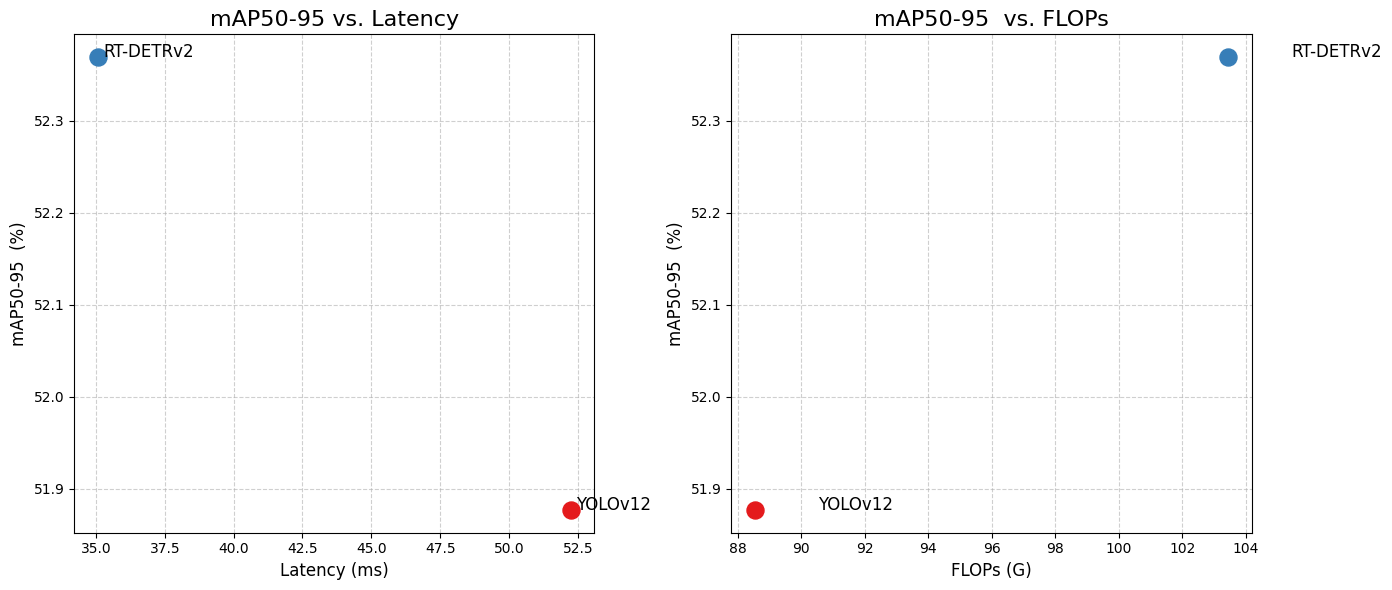

In [ ]:
import pandas as pd

# Get GFLOPs
yolo_flops = model_yolo.info()[3]
rtdetr_flops = model_rtdetr.info()[3]

# Store the stats
stats = {
    'YOLOv12': {
        'mAP': yolo_metrics.box.map * 100,  # Convert to percentage
        'Latency': yolo_metrics.speed['inference'],
        'FLOPs': yolo_flops
    },
    'RT-DETRv2': {
        'mAP': rtdetr_metrics.box.map * 100,
        'Latency': rtdetr_metrics.speed['inference'],
        'FLOPs': rtdetr_flops
    }
}

print("\n--- Collected Statistics ---")
print(stats)

print("\n--- Model Comparison Table ---")
# Create a DataFrame from the dictionary
df_stats = pd.DataFrame.from_dict(stats, orient='index')

# Rename columns for clarity in the table
df_stats = df_stats.rename(columns={
    'mAP': 'mAP50-95 (%)',
    'Latency': 'Latency (ms)',
    'FLOPs': 'FLOPs (G)'
})
display(df_stats.round(2))

print("\n--- Model Comparison Graph ---")
# Plot the Comparison Graphs
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
models = list(stats.keys())
colors = ['#e41a1c', '#377eb8'] # Red for YOLO, Blue for RT-DETR

# Plot 1: mAP50-95 vs. Latency
ax[0].set_title('mAP50-95 vs. Latency', fontsize=16)
ax[0].set_xlabel('Latency (ms)', fontsize=12)
ax[0].set_ylabel('mAP50-95  (%)', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

for i, model in enumerate(models):
    ax[0].scatter(stats[model]['Latency'], stats[model]['mAP'], s=150, color=colors[i], label=model, zorder=3)
    ax[0].text(stats[model]['Latency'] + 0.2, stats[model]['mAP'], model, fontsize=12)

# Plot 2: mAP50-95 vs. FLOPs
ax[1].set_title('mAP50-95  vs. FLOPs', fontsize=16)
ax[1].set_xlabel('FLOPs (G)', fontsize=12)
ax[1].set_ylabel('mAP50-95  (%)', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

for i, model in enumerate(models):
    ax[1].scatter(stats[model]['FLOPs'], stats[model]['mAP'], s=150, color=colors[i], label=model, zorder=3)
    ax[1].text(stats[model]['FLOPs'] + 2, stats[model]['mAP'], model, fontsize=12)

plt.tight_layout()
plt.show()